# Design document for initial metafeatures

1. Build raw dataset extractor

2. Pluis uit metafeatures:
- dataset length
- max(variance)/min(variance)
- PSR test
- Wavelet spectrum test
- Cumulative autocorrelation

perform these tasks
- describe hypothesized hyperparameter correlation
- gather info and summarize the metafeature
- find library to implement

3. The following step is making a metafeature implemenation plan.

# 2. Pluis uit metafeatures

In [1]:
# imports
import pandas as pd
import pickle

from src.metalearning.metadata import MetaSample, MetaDataset

# get an example series
pickle_in = open('../../data/metadata/interim/COAST_diff_8760',"rb")
time_series = pickle.load(pickle_in).time_series

# Dataset length

Hyperparameter correlation:
When the dataset is longer, it is expected that num_trees will become bigger, since you can capture more detailed info when there are more details (more data). More available untill convergence, means that we can also take it slower learning --> lower learning rate.

# Max(variance)/min(variance)
Hyperparameter correlation: if the dataset's variance fluctuates highly, that means the underlying signal is time variant in a way that the model does not capture. Hyperparameters should be guarding against overfitting.
It should be calculating by getting a rolling variance, with a window of let's say 10 days.

In [2]:
def maxminvar(time_series):
    rolling_var = time_series['endogenous'].rolling(24*10).var()
    maxminvar = rolling_var.max()/rolling_var.min()
    return maxminvar

maxminvar(time_series)

7.2134542815749425

# PSR test

Seems to not work!!!! always 0.0000 as p-value..

Next step: try an example, see if implementation still works. Otherwise, find difference between my and the example's implementation.

In [3]:
from statsmodels.tsa.stattools import adfuller


adf = adfuller(time_series['endogenous'])

In [4]:
adf

(-16.746424361150897,
 1.3450219754731512e-29,
 37,
 8722,
 {'1%': -3.431099968539641,
  '5%': -2.86187143613454,
  '10%': -2.5669464184887825},
 108779.76622351802)

# Wavelet spectrum test
Can't find any implementation that outputs a number. Put this on hold...

# Cumulative autocorrelation

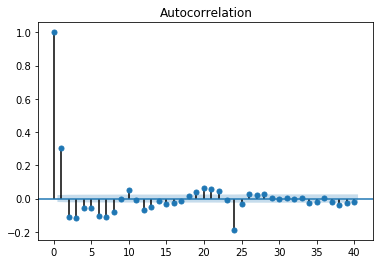

In [12]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(time_series['endogenous'].values)
pyplot.show()

In [22]:
from statsmodels.tsa.stattools import acf
sum(abs(acf(time_series['endogenous'], fft=True, nlags=48)))

23.96684712402865